# Lending Club Case Study

###### importing neccesary librabries

In [516]:
#libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### importing data set 

In [517]:
#dataset
df = pd.read_csv('loan.csv')
#reading dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


###### importing warnings

In [518]:
# to ignore warnings 
import warnings
warnings.filterwarnings("ignore")

##### Data Cleaning 

In [519]:
#checking data 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [520]:
#shape of dataset
df.shape

(39717, 111)

In [521]:
#total null values 
df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

We can observe there are many columns with null data.
For example there are 39717 is the row size and there are 39717 null values in some cloumns 

##### Fixing Rows and Columns

In [522]:
#dropping null rows 
df.dropna(axis=1,how='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Almost half rows where Having null values so deleting them is the best option as it will not be altering the course of our analyasis 

In [523]:
#finding the percent of null values in the dataset 

#sum of nulls
sum_isnull = df.isnull().sum()

#rounding them off 
round(sum_isnull/len(df)*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [524]:
#dropping columns with greater than 50 nulls 
df = df.loc[:,round(sum_isnull/len(df)*100,2) < 50]
#shape
df.shape

(39717, 54)

Now the data may have columns where there can be only 1 value thorugh out the column 
So this columns will not help in our analysis so 
dropping them can be the best option

In [525]:
#dropping columns with no unique values
df = df.loc[:, df.nunique() != 1]
df.shape

(39717, 45)

In [526]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [527]:
#checking columns to see if any columns can be deleted(through data dictionary), if cloumns can be merged or Split 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

We can observe that there are 3 indexes 
1. Pandas Default index
2. id 
3. member_id

I think we can keep member_id as index.

In [528]:
#dropping id column 
df = df.drop(['id'],axis=1)

In [529]:
# setting member_id as index
df = df.set_index('member_id')


In [530]:
df.shape

(39717, 43)

In [531]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Looking at Data Dictionary we can find some unnecessary columns.
So I think we can delete them as well

In [532]:
#checking columns 
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [533]:
#columns which are not necessary can be => 
columns_not_necessary=['funded_amnt_inv','emp_title','url','desc','title', 'earliest_cr_line',
              'total_acc','last_pymnt_d', 'last_credit_pull_d' ,'total_rec_int','total_rec_late_fee','recoveries',
                       'collection_recovery_fee','last_pymnt_amnt']
#dropping these columns 
df = df.drop(columns_not_necessary,axis=1)

In [534]:
#checing shape 
df.shape

(39717, 29)

In [535]:
df.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,0.00,0.00,5863.155187,5833.84,5000.00,0.0
1314167,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,0.00,0.00,1008.710000,1008.71,456.46,0.0
1313524,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,0.00,0.00,3005.666844,3005.67,2400.00,0.0
1277178,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,0.00,0.00,12231.890000,12231.89,10000.00,0.0
1311748,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,15,0,27783,53.90%,524.06,524.06,3513.330000,3513.33,2475.94,0.0
1311441,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,9,0,7963,28.30%,0.00,0.00,5632.210000,5632.21,5000.00,0.0
1304742,7000,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,...,7,0,17726,85.60%,0.00,0.00,10110.840000,10110.84,6985.61,0.0
1288686,3000,3000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,...,4,0,8221,87.50%,0.00,0.00,3939.135294,3939.14,3000.00,0.0
1306957,5600,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,11,0,5210,32.60%,0.00,0.00,646.020000,646.02,162.02,0.0


In [536]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'pub_rec_bankruptcies'],
      dtype='object')

In [537]:
#cheking data types of data
df.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

We need to convert the term and int_rate to int as it will help us for analysis 

In [538]:
#removing month from term 
df.term = df.term.apply(lambda x : x.replace(' months' , ''))

In [539]:
#changing data type of term 
df.term = df.term.astype('int64')

In [540]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
term                      int64
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [541]:
#removing % from int_rate 
df.int_rate = df.int_rate.apply(lambda x : x.replace('%' , ''))

In [542]:
# changing data type as before
df.int_rate = df.int_rate.astype('float64')

In [543]:
#cheching dtypes
df.dtypes

loan_amnt                 int64
funded_amnt               int64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [544]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,0.00,0.00,5863.155187,5833.84,5000.00,0.0
1314167,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,0.00,0.00,1008.710000,1008.71,456.46,0.0
1313524,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,0.00,0.00,3005.666844,3005.67,2400.00,0.0
1277178,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,0.00,0.00,12231.890000,12231.89,10000.00,0.0
1311748,3000,3000,60,12.69,67.79,B,B5,1 year,RENT,80000.0,...,15,0,27783,53.90%,524.06,524.06,3513.330000,3513.33,2475.94,0.0


In [545]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
pub_rec_bankruptcies     697
dtype: int64

In [546]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

I think we can change the data accordingly using key value pair 

In [547]:
#dict for replacing emp_length with numbers 
dict = {"10+ years" :"10",
"< 1 year": 0, 
"2 years" :  2,
"3 years" : 3,
"4 years"  : 4,
"5 years"  :5,
"1 year"  : 1,
"6 years"  : 6,
"7 years"  : 7,
"8 years" : 8,
"9 years" : 9}

In [548]:
df.emp_length = df.emp_length.apply(lambda x:dict.get(x))

In [549]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,13648,83.70%,0.00,0.00,5863.155187,5833.84,5000.00,0.0
1314167,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,...,3,0,1687,9.40%,0.00,0.00,1008.710000,1008.71,456.46,0.0
1313524,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,2956,98.50%,0.00,0.00,3005.666844,3005.67,2400.00,0.0
1277178,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,5598,21%,0.00,0.00,12231.890000,12231.89,10000.00,0.0
1311748,3000,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,...,15,0,27783,53.90%,524.06,524.06,3513.330000,3513.33,2475.94,0.0


In [550]:
#checking 
df.emp_length.value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [551]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'pub_rec_bankruptcies'],
      dtype='object')

Lets take a look at issue_d=> month when loan was funded

In [552]:
df.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

We need to extract month and year from issue_d

In [553]:
#importing date 
import datetime

In [554]:
#converting issue_d to datetime format 
df.issue_d = df.issue_d.apply(lambda x : datetime.datetime.strptime(x,'%b-%y'))

In [555]:
#creating 2 more columns issue_month and issue_year
df['issue_month'] = df.issue_d.dt.month
df['issue_year'] = df.issue_d.dt.year

In [556]:
df.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies,issue_month,issue_year
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,...,13648,83.70%,0.00,0.00,5863.155187,5833.84,5000.00,0.0,12,2011
1314167,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,...,1687,9.40%,0.00,0.00,1008.710000,1008.71,456.46,0.0,12,2011
1313524,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2956,98.50%,0.00,0.00,3005.666844,3005.67,2400.00,0.0,12,2011
1277178,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,...,5598,21%,0.00,0.00,12231.890000,12231.89,10000.00,0.0,12,2011
1311748,3000,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,...,27783,53.90%,524.06,524.06,3513.330000,3513.33,2475.94,0.0,12,2011
1311441,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,...,7963,28.30%,0.00,0.00,5632.210000,5632.21,5000.00,0.0,12,2011
1304742,7000,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,...,17726,85.60%,0.00,0.00,10110.840000,10110.84,6985.61,0.0,12,2011
1288686,3000,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,...,8221,87.50%,0.00,0.00,3939.135294,3939.14,3000.00,0.0,12,2011
1306957,5600,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,...,5210,32.60%,0.00,0.00,646.020000,646.02,162.02,0.0,12,2011


In [557]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

In [558]:
df.issue_month.value_counts()

12    4433
11    4167
10    3934
9     3648
8     3518
7     3476
6     3279
5     2999
4     2834
3     2692
1     2379
2     2358
Name: issue_month, dtype: int64

In [559]:
df.issue_year.value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1296599 to 86999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   term                  39717 non-null  int64         
 3   int_rate              39717 non-null  float64       
 4   installment           39717 non-null  float64       
 5   grade                 39717 non-null  object        
 6   sub_grade             39717 non-null  object        
 7   emp_length            38642 non-null  object        
 8   home_ownership        39717 non-null  object        
 9   annual_inc            39717 non-null  float64       
 10  verification_status   39717 non-null  object        
 11  issue_d               39717 non-null  datetime64[ns]
 12  loan_status           39717 non-null  object        
 13  purpose   

In [561]:
df.emp_length = df.emp_length.fillna("missing")

In [562]:
df.emp_length.value_counts()

10         8879
0          4583
2          4388
3          4095
4          3436
5          3282
1          3240
6          2229
7          1773
8          1479
9          1258
missing    1075
Name: emp_length, dtype: int64

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1296599 to 86999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   term                  39717 non-null  int64         
 3   int_rate              39717 non-null  float64       
 4   installment           39717 non-null  float64       
 5   grade                 39717 non-null  object        
 6   sub_grade             39717 non-null  object        
 7   emp_length            39717 non-null  object        
 8   home_ownership        39717 non-null  object        
 9   annual_inc            39717 non-null  float64       
 10  verification_status   39717 non-null  object        
 11  issue_d               39717 non-null  datetime64[ns]
 12  loan_status           39717 non-null  object        
 13  purpose   

#### Target Variable  - loan_status|

Now lets look at loan_status as its the main column. 

In [564]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

This has 3 main groups 
1. Fully Paid
2. Charged Off
3. Current

Here the fully paid (1) are non-defaulters and charged off(2) are defaulters but the current (3) do not belong to either defaulters or non defaulters so we can drop them 

In [565]:
#verifing
df.loan_status != 'Current'

member_id
1296599     True
1314167     True
1313524     True
1277178     True
1311748    False
           ...  
92174       True
90607       True
90390       True
89243       True
86999       True
Name: loan_status, Length: 39717, dtype: bool

In [566]:
#dropping all with Current value
df = df[df.loan_status != 'Current']

In [567]:
#verifing changes
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [568]:
#converting Fully Paid to 0 and Charged Off  to 1 

df.loan_status = df.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)

In [569]:
#changing dtypes
df.loan_status = df.loan_status.astype('int64')

#### Analysis

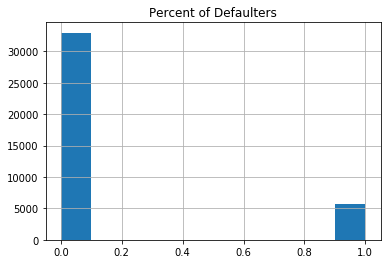

In [570]:
df.loan_status.hist()
plt.title("Percent of Defaulters")
plt.show()

In [571]:
#total default and non default
total_fully_paid = df.loan_status.value_counts()[0]
total_charged_off = df.loan_status.value_counts()[1]
total = total_fully_paid + total_charged_off
non_default = (total_fully_paid / total)*100
default = (total_charged_off / total)*100

In [572]:
print('So there are ' , non_default , '% non Defaulters and ' , default , '% defaulters')

So there are  85.41358840760039 % non Defaulters and  14.586411592399617 % defaulters


#### Overall analysis :
    1. There are 85.4% Fully paid 
    2. There are 15.6% Charged Off 

# Univatiate Analysis

In [573]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies,issue_month,issue_year
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,...,13648,83.70%,0.0,0.0,5863.155187,5833.84,5000.00,0.0,12,2011
1314167,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,...,1687,9.40%,0.0,0.0,1008.710000,1008.71,456.46,0.0,12,2011
1313524,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2956,98.50%,0.0,0.0,3005.666844,3005.67,2400.00,0.0,12,2011
1277178,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,...,5598,21%,0.0,0.0,12231.890000,12231.89,10000.00,0.0,12,2011
1311441,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,...,7963,28.30%,0.0,0.0,5632.210000,5632.21,5000.00,0.0,12,2011


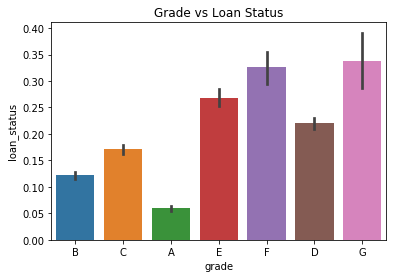

In [574]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.title("Grade vs Loan Status")
plt.show()

### Here we can observe that 
1. As the LC assigned loan grade increases from A to G the default rate increases 
2. LC grade is directly proportional to Default rate

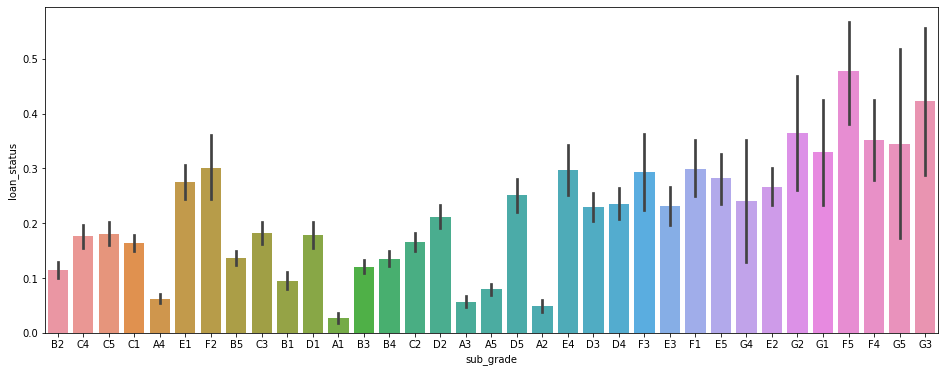

In [575]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

### Here we can observe that 
1. F and G Grades are having more defaulters
2. A2 has more defaulters can A1 and as we increace A3, A4 it increses. Same true for others

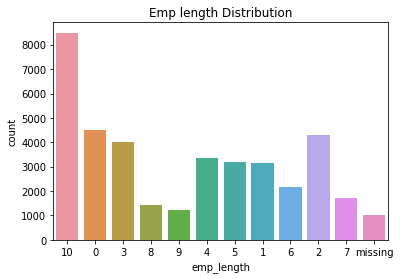

In [576]:
sns.countplot(df['emp_length'])
plt.title("Emp length Distribution")
plt.show()

### Here we can observe that 
1. People with 10+ Years experience tent to be defaulters

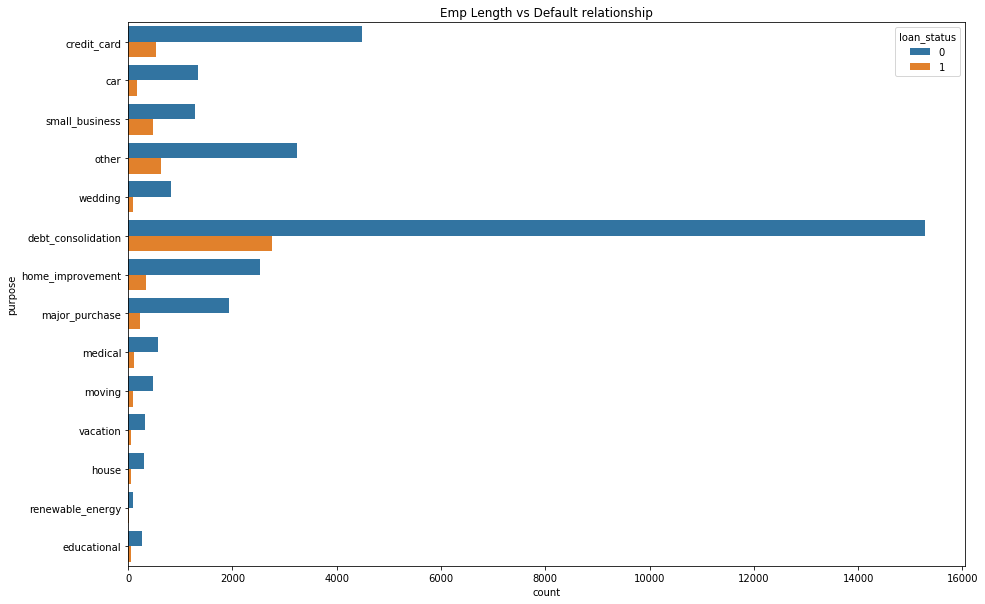

In [577]:
plt.figure(figsize=(15,10))
sns.countplot(y='purpose',hue='loan_status',data=df)
plt.title("Emp Length vs Default relationship")
plt.show()

### Here we can observe that 
1. Small business have higher rate of defaulters 
2. followed by renewable energy and enducation

In [578]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

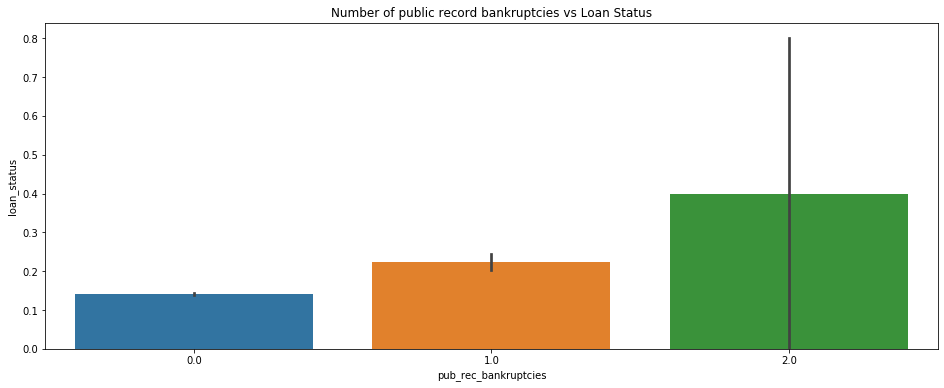

In [579]:
plt.figure(figsize=(16, 6))
sns.barplot(x='pub_rec_bankruptcies', y='loan_status', data=df)
plt.title("Number of public record bankruptcies vs Loan Status")
plt.show()

### Here we can observe that 
1. The people who have declared backruptcies are tend to default more

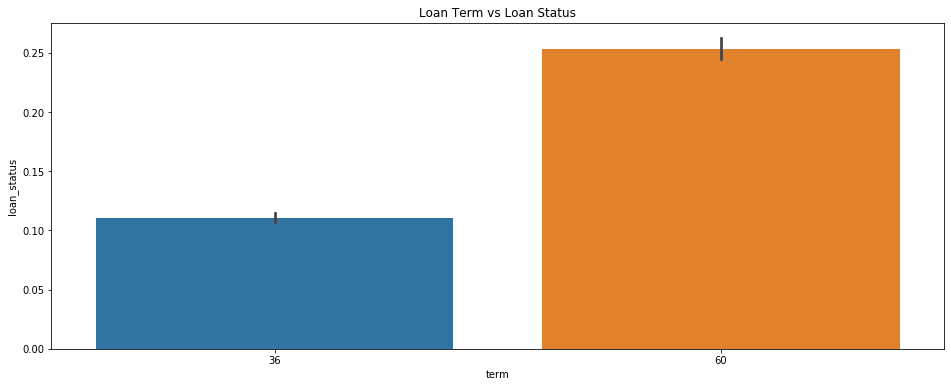

In [583]:
plt.figure(figsize=(16, 6))
sns.barplot(x='term', y='loan_status', data=df)
plt.title("Loan Term vs Loan Status")
plt.show()

### Here we can observe that 
1. The people with 60 months of term has defaulted more than 36 months

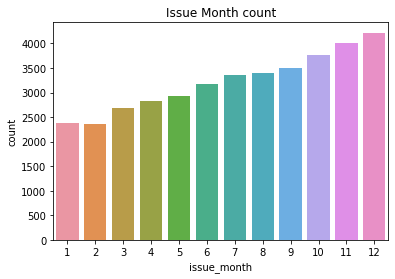

In [584]:
sns.countplot(df['issue_month'])
plt.title("Issue Month count")
plt.show()

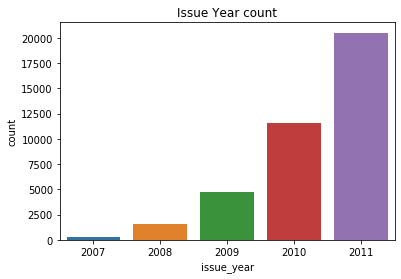

In [585]:
sns.countplot(df['issue_year'])
plt.title("Issue Year count")
plt.show()

1. As the year processeds count increases 
2. In 2011 most count of loans were taken 

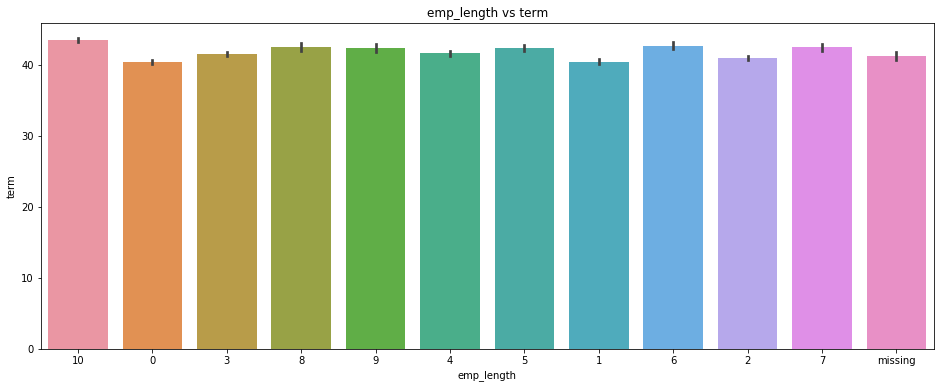

In [586]:
plt.figure(figsize=(16, 6))
sns.barplot(x='emp_length', y='term', data=df)
plt.title("emp_length vs term")
plt.show()

In [587]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

# Bivariate Analysis

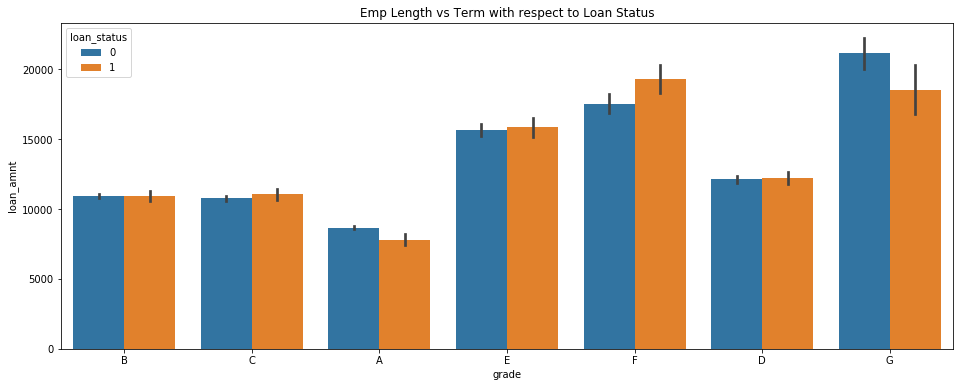

In [588]:
plt.figure(figsize=(16, 6))
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=df)
plt.title("Emp Length vs Term with respect to Loan Status")
plt.show()

### Here we can observe that 
1. People form G grade tend to take more loan amount
2. loan Amount gradually increases from A => G

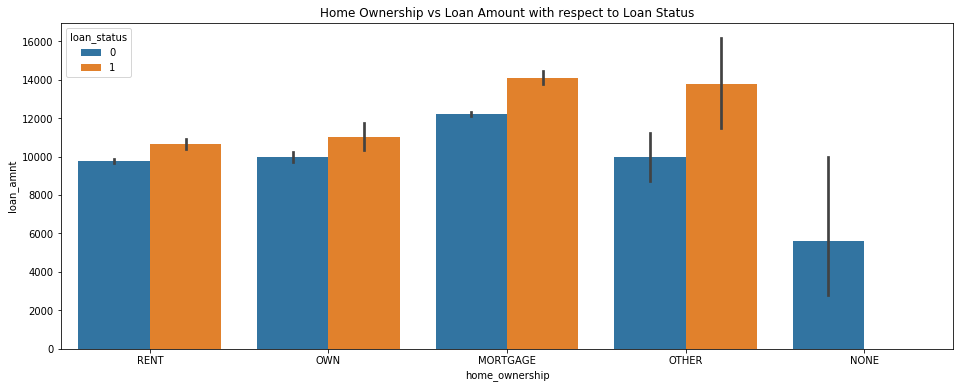

In [589]:
plt.figure(figsize=(16, 6))
sns.barplot(x='home_ownership', y='loan_amnt',hue="loan_status",  data=df)
plt.title("Home Ownership vs Loan Amount with respect to Loan Status")
plt.show()

### Here we can observe that 
1. People form Mortgage tend to take more loan amount

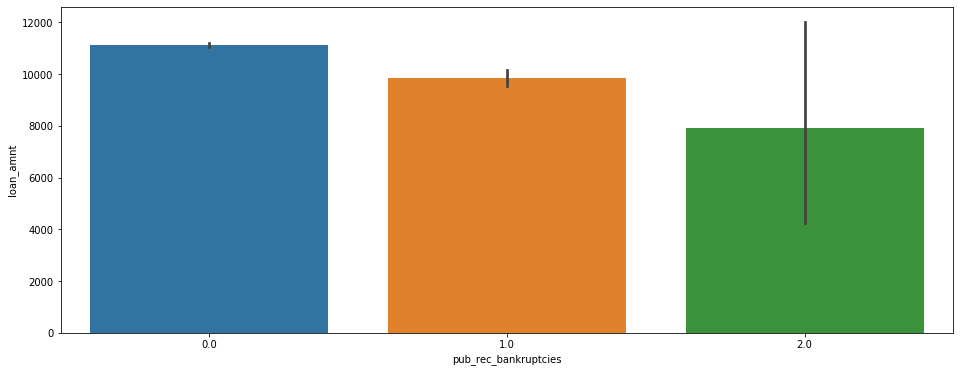

In [590]:
plt.figure(figsize=(16, 6))
sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', data=df)
plt.show()

### Intresting observation
1. People with 1 or 2 backrupcies tent to take low amout loans 

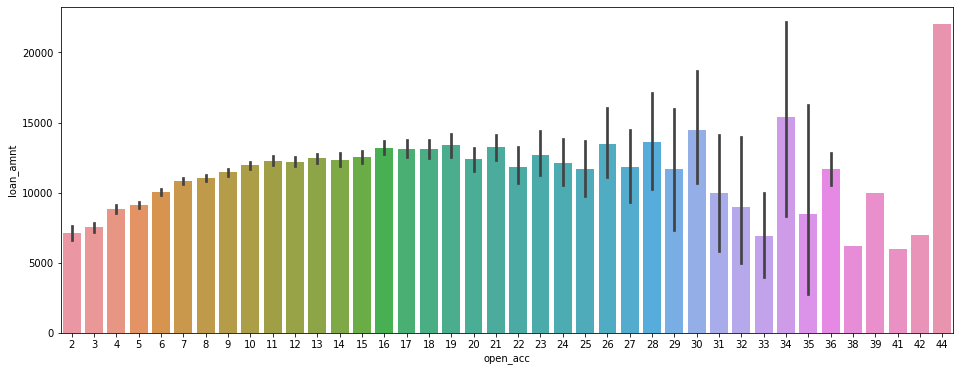

In [591]:
plt.figure(figsize=(16, 6))
sns.barplot(x='open_acc', y='loan_amnt', data=df)
plt.show()

### Intresting observation
1. More the number of open credit lines in the borrower's credit file the more loan amount is taken

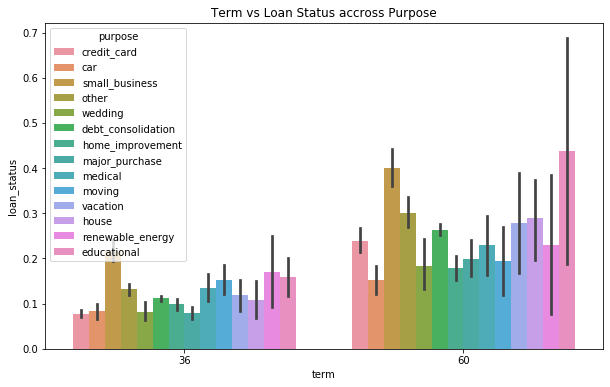

In [594]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', hue='purpose', data=df)
plt.title("Term vs Loan Status accross Purpose")
plt.show()

### We Observe
1. In 60 months term more defaulters are in education